## Assignment 1: Math Foundation and Programming

This assignment intends to:
- test your Python programming skills
- understand differentiation and gradients
- think classical regression problems with a deep learning mind

- Suppose you have a model $\hat{y} = \sigma(z)$, where: 
    - $ z= w^T x + b,~i.e.~z=w_1*x_1+w_2*x_2+w_3*x_3+b$, 
    - $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{(1+e^{-z})}$, and
    - $w, b$ are parameters. $b$ is a scalar, $x,w~\in R^3$, specifically, $w = [w_1, w_2, w_3]^T$, $x = [x_1, x_2, x_3]^T$.
- Your ground truth lable $y=0~or~1$. You measure your model performance by two possible cost functions:
  - Squared error: $s=\frac{1}{2}(y-\hat{y})^2$
  - Cross entropy: $e=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$
- Note, for simplicity, let's assume there is only 1 training sample.
- Following the instruction below to program your solution in Python notebook step by step carefully:

1. Write a function to calculate each of the following partial derivatives. The inputs to the function are all the variables in the formula and the returned derivatives are expressions of these variables. An example is given below.
   - $ \frac{\partial{z}}{\partial{w}}$. Note $ \frac{\partial{z}}{\partial{w}} \in R^{1x3}$
   - $ \frac{dz}{db}$
   - $ \frac{d{\hat{y}}}{d{z}}$
   - $ \frac{d{s}}{d{\hat{y}}}$
   - $ \frac{d{e}}{d{\hat{y}}}$

2. Write a function $gradient\_desc$ ($v$, $dev$, $r$) to adjust a parameter value ($v$) by its gradient ($dev$), i.e. return the new value of parameter $v$ as $v$ $\leftarrow$ $v-\lambda*dev$, where $\lambda$ is the learning rate.

3. Write a function train($x, y, w_0, b_0, loss_fun, \lambda, r$) as follows:
   1. Initialize $w$, $b$ with w_0, b_0
   2. Use a loop of $r$ rounds to do the following
       1. Calculate $\hat{y}$, and errors $s$ or $e$ depending on the value of the loss function $loss\_fun$
       2. Use chain rule to calculate the partial derivatives $\frac{\partial{s}}{\partial{w}}, \frac{\partial{s}}{\partial{b}}, \frac{\partial{e}}{\partial{w}}, \frac{\partial{e}}{\partial{b}}$
       3. Update $w, b$ using the function $gradient\_desc$
       4. record $\hat{y}$, $s$, $e$
   3. Return the history of $\hat{y}$, and $s$ or $e$ depending on the value $loss\_fun$

4. Test your program with these two test cases and plot the history of loss $s, e$ (i.e. learning curves) respectively. Sample plots have been given.
    1. Case 1: $x=[1,0.5,-2]^T, y=1, w_0=[-1,-2,1]^T, b_0=-1, \lambda = 0.1$
    2. Case 2: $x=[1,0.5,-2]^T, y=1, w_0=[-3,-2,2]^T, b_0=-20,  \lambda = 0.1$


5. Analyze the differences between these two learning curves. Can you explain the differences in these two cases by using $\hat{y}$ and the derivaties, i.e. $ \frac{d{s}}{d{z}}, \frac{d{e}}{d{z}}$? For example, it can be shown that $\frac{d{s}}{d{z}} = (\hat{y}-y)*\hat{y}*(1-\hat{y})$. <b>Write down your analysis at the end of your jupyter notebook as markdowns</b>.

<b>Please submit your solution using Jupyter Notebook </b>

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In this step, we don't use any derivative function, we just use current formula to get result. Matining the same 

In [38]:
#this part we only need calcuate 
def dz_dw(w, x, b):
    return x

# Add other gradients
def dz_db(w, x, b):
    return 1

def dy_dz(w,x,b):
    z=(w.T.dot(x)+b)
    return (1/(1+np.exp(-z))*(1-1/(1+np.exp(-z))))

def ds_dy(w, x, b):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    return y_hat-y

def de_dy(w, x, b, y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    return ((1-y)/(1-y_hat)-y/y_hat)

In [39]:
#r=rotation
def gradient_desc(v, dev, lam):
    v=v-lam*dev
    return v
            
    
    # add yoru code

In [40]:
def train_s(x, y, w0, b0, loss_fun, lam, r):
    w=w0
    b=b0
    s_history=np.zeros(r) 
    y_s_prediction=np.zeros(r)
    for i in range(1,r):
        #loss_fun_s(w.x,b,y)
        #loss_fun_e(w.x.b.y)
        #print("train_e z:",z)
        ds_dw = ds_dy(w, x, b) * dy_dz(w, x, b) * dz_dw(w, x, b)
        ds_db = ds_dy(w, x, b) * dy_dz(w, x, b) * dz_db(w, x, b)
        #de_dw = de_dy(e,y_hat,y) * dy_dz(y,z) * dz_dw(w,x,b)
        #de_db = de_dy(e,y_hat,y) * dy_dz(y,z) * dz_db(w,x,b)
        #print("train_e z:",z)
        w=gradient_desc(w,ds_dw,lam)
        b=gradient_desc(b,ds_db,lam)
        
        
        s_history[i],y_s_prediction[i]=(loss_fun_s(w,x,b,y))
        #print("loss_fun_s:",loss_fun_s(w,x,b,y))
    return s_history,y_s_prediction
    
   

In [41]:
def train_e(x, y, w0, b0, loss_fun, lam, r):
    w=w0
    b=b0
    e_history=np.zeros(r) 
    y_e_prediction=np.zeros(r)
    for i in range(1,r):

        #ds_dw = ds_dy(s,y_hat,y) * dy_dz(y,z) * dz_dw(w,x,b)
        #ds_db = ds_dy(s,y_hat,y) * dy_dz(y,z) * dz_db(w,x,b)
        de_dw = de_dy(w, x, b, y) * dy_dz(w,x,b) * dz_dw(w, x, b)
        de_db = de_dy(w, x, b, y) * dy_dz(w, x, b) * dz_db(w, x, b)
    
        w=gradient_desc(w,de_dw,lam)
        b=gradient_desc(b,de_db,lam)
        #print("train_e w0:",w)
        
        e_history[i],y_e_prediction[i]=loss_fun_e(w,x,b,y)
        #y_e_prediction=y_hat
    return e_history,y_e_prediction
    
   

In [42]:
def loss_fun_s(w,x,b,y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    #print(w,x,b,y)
    #print("y_hat result is:",y_hat,"\n")
    f1 = y_hat-y
    f2 = 2
    s = 1/2 * (np.power(f1,f2))
    return s,y_hat

In [43]:
def loss_fun_e(w,x,b,y):
    y_hat=1/(1+np.exp(-w.T.dot(x)-b))
    e = (-1* y * np.log(y_hat))-((1-y) * np.log(1-y_hat))
    return e,y_hat

In [44]:
if __name__ == '__main__':
    
    # case 1:
    x=np.array([[1],
                [0.5],
                [-2]])
    w0=np.array([[-1],
                 [-2],
                 [1]])
    b0=-1
    y=1
    w=w0
    b=b0
    lam = 0.1
    r = 500
    z = w.T.dot(x) + b
    
    # add your code
    s=loss_fun_s(w,x,b,y)
    e=loss_fun_e(w,x,b,y)
    
    
    s_history,s_prediction=train_s(x,y,w,b,s,lam,r)
    #print(s_history)
    e_history,e_prediction=train_e(x,y,w,b,e,lam,r)
    print(e_prediction)
    
    
    

[0.         0.0123804  0.02271127 0.04104735 0.07230767 0.12217828
 0.19414107 0.28502681 0.38395289 0.47807055 0.55932715 0.62570911
 0.67869568 0.7208334  0.75455929 0.78184981 0.80421078 0.82276455
 0.83834471 0.85157373 0.86292081 0.87274369 0.88131831 0.88886008
 0.89553903 0.90149085 0.90682488 0.91163012 0.91597959 0.91993374
 0.92354297 0.92684963 0.92988949 0.93269302 0.93528626 0.93769161
 0.93992848 0.94201367 0.9439619  0.94578603 0.9474974  0.94910601
 0.95062073 0.95204944 0.95339918 0.95467625 0.95588629 0.9570344
 0.95812515 0.9591627  0.9601508  0.96109288 0.96199205 0.96285114
 0.96367276 0.96445927 0.96521287 0.96593556 0.96662919 0.96729547
 0.96793595 0.96855212 0.9691453  0.96971676 0.97026766 0.97079908
 0.97131203 0.97180745 0.97228622 0.97274915 0.97319701 0.97363053
 0.97405038 0.97445719 0.97485155 0.97523402 0.97560514 0.97596539
 0.97631524 0.97665514 0.9769855  0.97730671 0.97761915 0.97792317
 0.97821911 0.97850728 0.97878797 0.97906149 0.97932809 0.97958

In [24]:
print(len(s_history))

500


In [25]:
horizon=list(range(0,500))

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


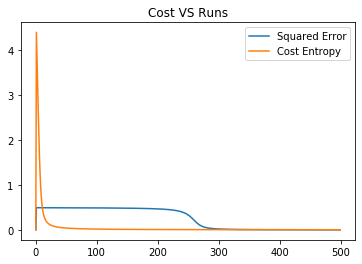

In [26]:

p1=plt.plot(horizon,s_history)
p2= plt.plot(horizon,e_history)
plt.title("Cost VS Runs")
plt.legend([p1,p2],labels=['Squared Error','Cost Entropy'],loc=1)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


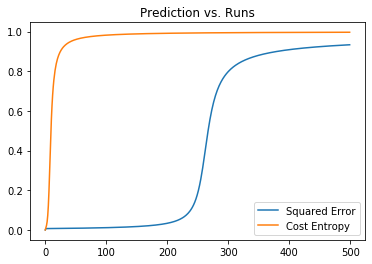

In [27]:
p3=plt.plot(horizon,s_prediction)
p4=plt.plot(horizon,e_prediction)
plt.title("Prediction vs. Runs")
plt.legend([p3,p4],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

<br>

<br>

<br>

<br>

<br>

In [28]:
   
    # case 2:
    x=np.array([[1],
                [0.5],
                [-2]])
    w0=np.array([[-3],
                 [-2],
                 [2]])
    b0=-1
    y=1
    w=w0
    b=b0
    lam = 0.1
    r = 500
    z = w.T.dot(x) + b
    
    s=loss_fun_s(w,x,b,y)
    e=loss_fun_e(w,x,b,y)
    
    
    s_history,s_prediction=train_s(x,y,w,b,s,lam,r)
    print(s_history)
    e_history,e_prediction=train_e(x,y,w,b,e,lam,r)
    print(e_history)
    

[0.         0.4998766  0.49987659 0.49987658 0.49987657 0.49987657
 0.49987656 0.49987655 0.49987654 0.49987653 0.49987652 0.49987651
 0.4998765  0.49987649 0.49987648 0.49987647 0.49987646 0.49987645
 0.49987644 0.49987643 0.49987642 0.49987641 0.4998764  0.49987639
 0.49987638 0.49987637 0.49987637 0.49987636 0.49987635 0.49987634
 0.49987633 0.49987632 0.49987631 0.4998763  0.49987629 0.49987628
 0.49987627 0.49987626 0.49987625 0.49987624 0.49987623 0.49987622
 0.49987621 0.4998762  0.49987619 0.49987618 0.49987617 0.49987616
 0.49987615 0.49987615 0.49987614 0.49987613 0.49987612 0.49987611
 0.4998761  0.49987609 0.49987608 0.49987607 0.49987606 0.49987605
 0.49987604 0.49987603 0.49987602 0.49987601 0.499876   0.49987599
 0.49987598 0.49987597 0.49987596 0.49987595 0.49987594 0.49987593
 0.49987592 0.49987591 0.49987591 0.4998759  0.49987589 0.49987588
 0.49987587 0.49987586 0.49987585 0.49987584 0.49987583 0.49987582
 0.49987581 0.4998758  0.49987579 0.49987578 0.49987577 0.4998

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


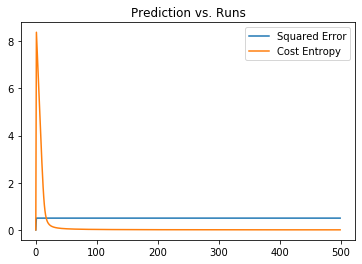

In [29]:
p5=plt.plot(horizon,s_history)
p6= plt.plot(horizon,e_history)
plt.title("Prediction vs. Runs")
plt.legend([p5,p6],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


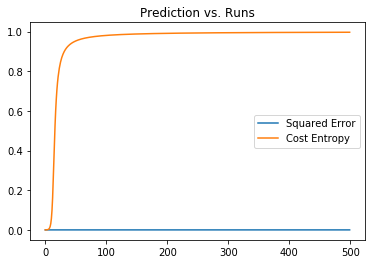

In [30]:
p7=plt.plot(horizon,s_prediction)
p8=plt.plot(horizon,e_prediction)
plt.title("Prediction vs. Runs")
plt.legend([p7,p8],labels=['Squared Error','Cost Entropy'],loc=0)
plt.show()

### Question 5

- The only different between these two data set it the initial w1(the first element of w), So the inital start point is very sensitive to gradient descent. And we can see Data set 2 did change it's sigmod loss functio from begining. Maybe this point is already the local optimical minizie for this dataset and gradient descent can't find global minization.
- After a instert a moniter to see vecter w, we can see in case 2,vecter w is actully never change from first begining, which means 
$ \frac{d{\hat{y}}}{d{w}}$ = 0 and 
after first caculation. So this is weakness of Squared Loss fucntion and can be avoid by Cost Entropy Lost Functoin.